In [2]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import PIL
import numpy as np
import matplotlib.pyplot as plt

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [17]:
image = tf.Variable(tf.zeros((28,28)))
dummy = mnist.train.images[0]
x_ = tf.placeholder(tf.float32, (28,28))

img = dummy.reshape((28,28))

x_hat = image
assign_op = tf.assign(x_hat, x_)

epsilon = tf.placeholder(tf.float32, ())

below = x_ - epsilon 
above = x_ + epsilon
projected = tf.clip_by_value(tf.clip_by_value(x_hat, below, above), 0, 1)

with tf.control_dependencies([projected]):
    project_step = tf.assign(x_hat,projected)
    
demo_epsilon = 0.2
demo_learning = 1e-1
dummy = dummy[np.newaxis,:]
dummys_l = mnist.train.labels[1]
dummy_l = dummys_l[np.newaxis,:]
print(dummy_l.shape)

sess = tf.InteractiveSession()
sess.run(assign_op, feed_dict={x_: img})

for i in range(100):
    sess.run(project_step, feed_dict={x_: img, epsilon: demo_epsilon})
#     _, loss = sess.run([optimizer, cost], feed_dict={x:dummy , y:dummys_l})



(1, 10)


In [31]:
#Hyperparameters
learning_rate = 0.01
training_epochs = 1


# Single image classification
x = tf.placeholder(tf.float32, (None, 784)) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes
x_image = tf.reshape(x, [-1,28,28,1]) # mnist image comes in as 784 vector


# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
keep_prob = tf.placeholder(tf.float32)

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

deriv = tf.gradients(cost, x)
image_adv = tf.stop_gradient(x - tf.sign(deriv)*learning_rate)
image_adv = tf.clip_by_value(image_adv, 0, 1)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    
    #Image to train
    dummy = mnist.train.images[0]
    dummy = np.reshape(dummy,(1,784))
    dummy_l = mnist.train.labels[0]
    print(dummy.shape)
    dummy_l = dummy_l[np.newaxis,:]
    
    #Image to test
    dummy2 = mnist.train.images[0]
    dummy2 = dummy2[np.newaxis,:]
    dummy2_l = mnist.train.labels[0]
    dummy2_l = dummy2_l[np.newaxis,:]
        
    # Run optimization op (backprop) and cost op (to get loss value)
    _, c = sess.run([optimizer, cost], feed_dict={x: dummy,
                                                          y: dummy_l})
        
    print("Epoch:", '%04d' % (1), "cost=", "{:.9f}".format(c))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
#     print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    print("Accuracy:", accuracy.eval({x: dummy2, y: dummy2_l}))
    
    #Computes gradients, I think or hope!
    dydx = sess.run(deriv,  feed_dict = {x: dummy, y:dummy_l}) # can't seem to access 'deriv' w/o running this
#     _ = sess.run([grad_input, cost], feed_dict={x: dummy,
#                                                           y: dummy_l})
    x_adv = sess.run(image_adv, {x: dummy, y:dummy_l})
    
    print (x_adv)

(1, 784)
Epoch: 0001 cost= 2.302585125
Optimization Finished!
Accuracy: 1.0
[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.    

In [45]:
tf.image?

Tensor("transpose_2:0", shape=(6,), dtype=int32)


In [67]:
#LOGISTIC REGRESSION

# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

#https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/logistic_regression.py

Epoch: 0001 cost= 1.183312914
Epoch: 0002 cost= 0.665077362
Epoch: 0003 cost= 0.552732731
Epoch: 0004 cost= 0.498695973
Epoch: 0005 cost= 0.465296411
Epoch: 0006 cost= 0.442628961
Epoch: 0007 cost= 0.425678634
Epoch: 0008 cost= 0.412030358
Epoch: 0009 cost= 0.401618818
Epoch: 0010 cost= 0.392194463
Epoch: 0011 cost= 0.384686858
Epoch: 0012 cost= 0.378191893
Epoch: 0013 cost= 0.372338644
Epoch: 0014 cost= 0.367285049
Epoch: 0015 cost= 0.362729420
Epoch: 0016 cost= 0.358750533
Epoch: 0017 cost= 0.354745524
Epoch: 0018 cost= 0.351432862
Epoch: 0019 cost= 0.348353285
Epoch: 0020 cost= 0.345406492
Epoch: 0021 cost= 0.342725566
Epoch: 0022 cost= 0.340326975
Epoch: 0023 cost= 0.337951536
Epoch: 0024 cost= 0.335844693
Epoch: 0025 cost= 0.333530496
Optimization Finished!
Accuracy: 0.9137


In [66]:
tf.argmax?

This creates a simple linear model and defines a regression loss, 
then you can easily define the gradient of the loss with respect of 
the input (x). Then you just need to wrap this into a 
TensorFlow session in order to train the model and run 
the code (like adding optimizers and training the model). 
Note that still you need to add a classification loss to 
this code to make it work properly, but the idea is to point you in the right direction.

In [79]:
#grad = tf.train.GradientDescentOptimizer(image).compute_gradients(cost)
# tf Graph Input
# x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
# y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

#Getting an image
dummy = mnist.train.images[0]
x_ = dummy[np.newaxis,:]
dummy_l = mnist.train.labels[0]
y_ = dummy_l[np.newaxis,:]

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x_, W) + b) # Softmax



TypeError: 'Tensor' object is not iterable.

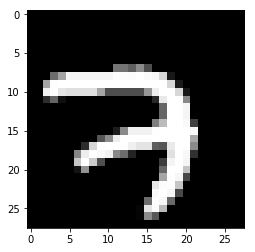

In [29]:
plt.imshow(x_adv.reshape((28,28)), cmap='Greys')

plt.imshow(img, cmap='Greys_r')

(1, 784)


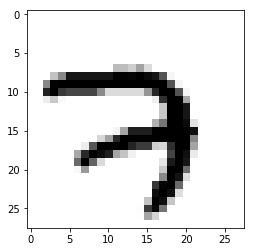

In [115]:
adv_ = adv.reshape(1,784)
print(adv_.shape)
plt.imshow(adv_.reshape((28,28)), cmap='Greys')

In [126]:
print(mnist.train.labels[1])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
